<a href="https://colab.research.google.com/github/yashirmehmood/DataAnalysis/blob/main/Bike_Sharing_Demand_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/All Data Files/

/content/drive/MyDrive/Colab Notebooks/All Data Files


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train_data = pd.read_csv("BikeSharingTrain.csv")
test_data = pd.read_csv("BikeSharingTest.csv")

In [ ]:
train_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [ ]:
train_data.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [ ]:
#firt we will exctracte some useful features from datetime 
train_data['datetime']=pd.to_datetime(train_data['datetime'])
train_data["year"]=train_data.datetime.dt.year
train_data["month"]=train_data.datetime.dt.month
train_data["Day"]=train_data.datetime.dt.day

def hr_func(ts):
    return ts.hour

train_data['hour'] = train_data['datetime'].apply(hr_func)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  Day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
dtypes: datetime64[ns](1), 

In [ ]:
train_data.describe

<bound method NDFrame.describe of                  datetime  season  holiday  workingday  ...  year  month  Day  hour
0     2011-01-01 00:00:00       1        0           0  ...  2011      1    1     0
1     2011-01-01 01:00:00       1        0           0  ...  2011      1    1     1
2     2011-01-01 02:00:00       1        0           0  ...  2011      1    1     2
3     2011-01-01 03:00:00       1        0           0  ...  2011      1    1     3
4     2011-01-01 04:00:00       1        0           0  ...  2011      1    1     4
...                   ...     ...      ...         ...  ...   ...    ...  ...   ...
10881 2012-12-19 19:00:00       4        0           1  ...  2012     12   19    19
10882 2012-12-19 20:00:00       4        0           1  ...  2012     12   19    20
10883 2012-12-19 21:00:00       4        0           1  ...  2012     12   19    21
10884 2012-12-19 22:00:00       4        0           1  ...  2012     12   19    22
10885 2012-12-19 23:00:00       4        0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7facc52dab90>,
      dtype=object)

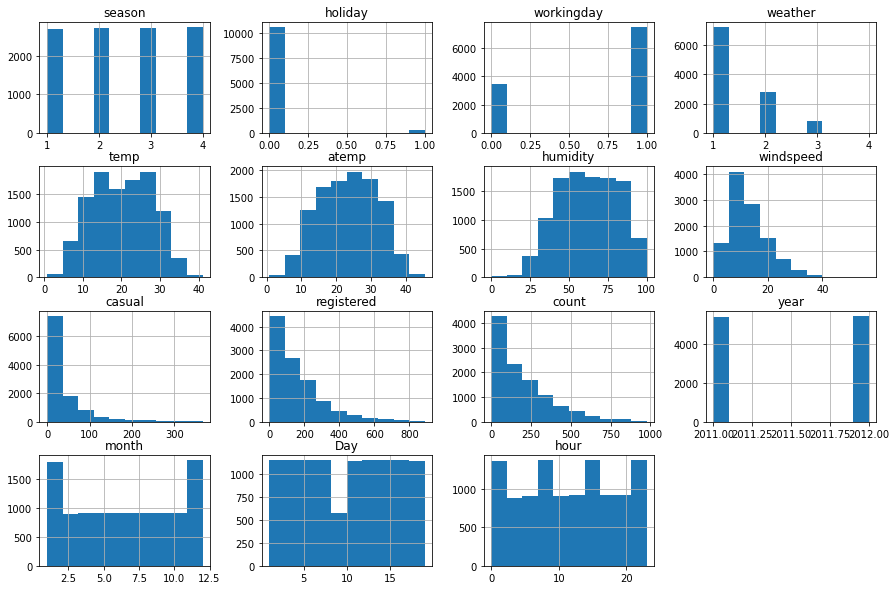

In [ ]:
train_data.hist(figsize= (15, 10))

In [ ]:
train_data.var()

season            1.245845
holiday           0.027755
workingday        0.217304
weather           0.401751
temp             60.708872
atemp            71.818856
humidity        370.371306
windspeed        66.659670
casual         2496.049219
registered    22812.789514
count         32813.313153
year              0.250019
month            11.863709
Day              29.993238
hour             47.828815
dtype: float64

In [ ]:
train_data['registered'].sum()

1693341

In [ ]:
train_data['casual'].sum()

392135

In [ ]:
train_data['count'].sum()

2085476

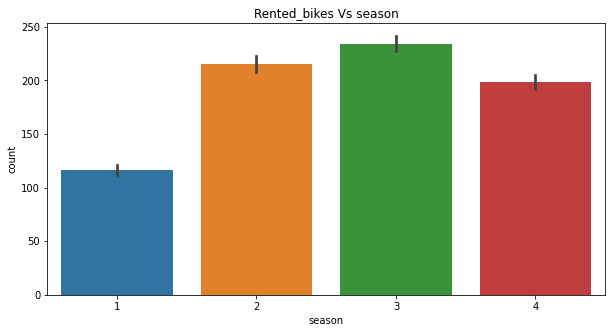

In [ ]:
ig,ax=plt.subplots(figsize=(10,5))

sns.barplot(data=train_data,x='season',y='count')
ax.set_title('Rented_bikes Vs season')
plt.show()

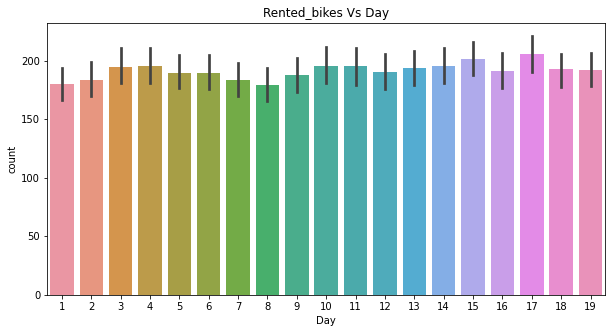

In [ ]:
ig,ax=plt.subplots(figsize=(10,5))

sns.barplot(data=train_data,x='Day',y='count')
ax.set_title('Rented_bikes Vs Day')
plt.show()

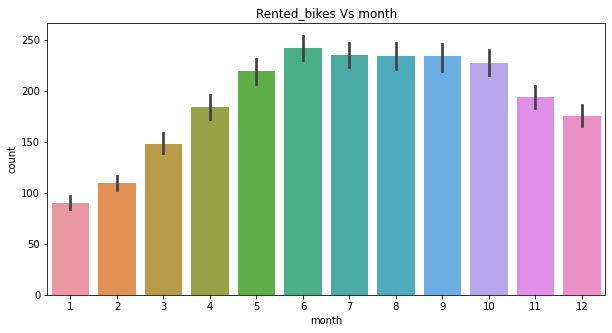

In [ ]:
ig,ax=plt.subplots(figsize=(10,5))

sns.barplot(data=train_data,x='month',y='count')
ax.set_title('Rented_bikes Vs month')
plt.show()

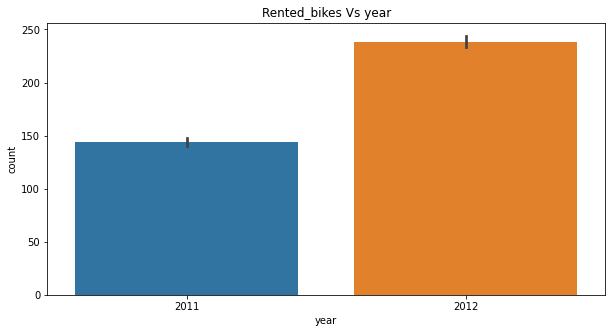

In [ ]:
ig,ax=plt.subplots(figsize=(10,5))

sns.barplot(data=train_data,x='year',y='count')
ax.set_title('Rented_bikes Vs year')
plt.show()

In [ ]:
train_data[["season", "count"]].groupby(['season'], as_index=False).sum().sort_values(by='count', ascending=False)

,season,count
2,3,640662
1,2,588282
3,4,544034
0,1,312498


In [ ]:
#here we will extract weekday from days and see if weekend will be useful
import datetime as dt
import os
train_data['weekday'] = train_data[['datetime']].apply(lambda x: dt.datetime.strftime(x['datetime'], '%A'), axis=1)

for i in range(len(train_data['weekday'])):
    if train_data['weekday'][i]=="Sunday" or train_data['weekday'][i]=="Saturday" :
        train_data['weekday'][i] = 0
    else:
        train_data['weekday'][i] = 1
train_data["weekday"] = train_data[["weekday"]].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


(array([3163.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        7723.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

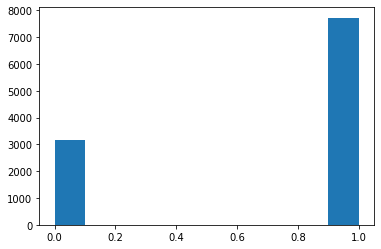

In [ ]:
#from histgram we can see number of rentals increase in the weekend 
plt.hist(train_data.weekday)

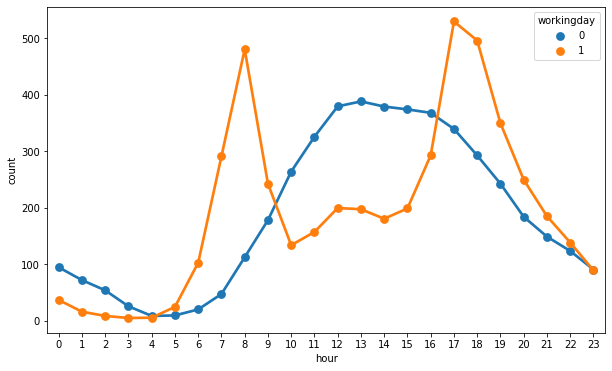

In [ ]:
workday_avg = pd.DataFrame(train_data.groupby(['hour', 'workingday'])['count'].mean()).reset_index()

plt.figure(figsize=(10, 6))
sns.pointplot(data=workday_avg, x='hour', y='count', hue='workingday')

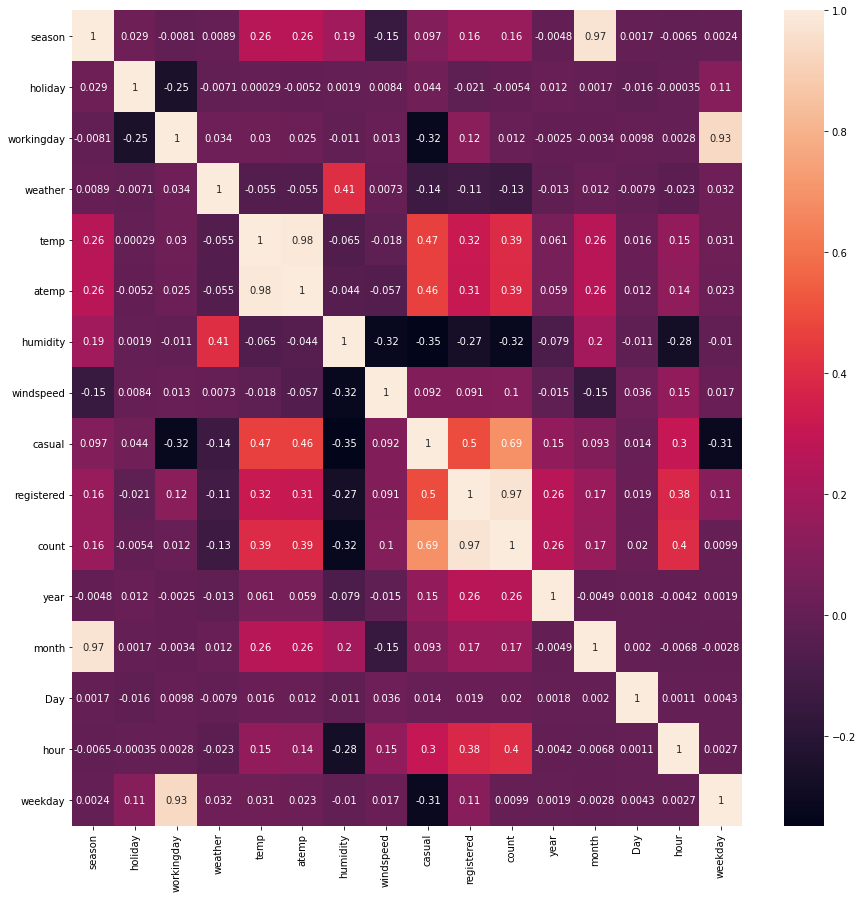

In [ ]:
#draw a seaborn correlation heatmap to detect correlation between features for feature selection process
fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
sns.heatmap(train_data.corr(), annot = True,ax=ax)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

X = train_data.drop(['datetime', 'casual', 'registered', 'count', 'Day'], axis=1)
y = train_data['count']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#Root Mean Squared Logarithmic Error

from math import sqrt
def RMSLE(y_pred , y_actual):
    n = y_pred.size 
    RMSLE = sqrt(((np.log(y_pred+1)-np.log(y_actual+1))**2).sum()/n)
    return RMSLE

In [ ]:
lr = LinearRegression().fit(X_train, y_train)

train_pred = lr.predict(X_train)
val_pred = lr.predict(X_val)

train_score = RMSLE(train_pred, y_train)
val_score = RMSLE(val_pred ,y_val)

print('Train score:', train_score)
print('validation score:', val_score)

Train score: 1.1576229912737053
validation score: 1.1440130588322612


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  


In [ ]:
#TRy to find the best hyperparameters for RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50,60,70,80,90,100],
              "max_depth": [3, 7, 9 ,10 , 15]}
# kfold = (n_splits=3, shuffle=True, random_state=1)
BestModel= GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1,verbose=3)
BestModel.fit(X_train, y_train)
print(BestModel.best_score_,BestModel.best_estimator_,BestModel.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.7min finished


-45.2380448073327 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=70, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False) {'max_depth': 15, 'n_estimators': 70}


In [ ]:
rf = RandomForestRegressor(max_depth=9, n_estimators=200, random_state=42).fit(X_train, y_train)

tr_pred = rf.predict(X_train)
v_pred = rf.predict(X_val)

tr_score = RMSLE(tr_pred, y_train)
v_score = RMSLE(v_pred ,y_val)

print('validation score:', v_score)
print('Train score:', tr_score)

validation score: 0.38618093114478536
Train score: 0.3367481018402309


In [ ]:
test_data['datetime']=pd.to_datetime(test_data['datetime'])
test_data["year"]=test_data.datetime.dt.year
test_data["month"]=test_data.datetime.dt.month
test_data["Day"]=test_data.datetime.dt.day

def hr_func(ts):
    return ts.hour

test_data['hour'] = test_data['datetime'].apply(hr_func)

In [ ]:
test_data['weekday'] = test_data[['datetime']].apply(lambda x: dt.datetime.strftime(x['datetime'], '%A'), axis=1)

In [ ]:
for i in range(len(test_data['weekday'])):
    if test_data['weekday'][i]=="Sunday" or test_data['weekday'][i]=="Saturday" :
        test_data['weekday'][i] = 0
    else:
        test_data['weekday'][i] = 1
        
test_data["weekday"] = test_data[["weekday"]].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
test_data = test_data.drop(['datetime', 'Day'], axis=1)

In [ ]:
test_data

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,hour,weekday
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,0,1
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,1,1
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,2,1
3,1,0,1,1,10.66,12.880,56,11.0014,2011,1,3,1
4,1,0,1,1,10.66,12.880,56,11.0014,2011,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6488,1,0,1,2,10.66,12.880,60,11.0014,2012,12,19,1
6489,1,0,1,2,10.66,12.880,60,11.0014,2012,12,20,1
6490,1,0,1,1,10.66,12.880,60,11.0014,2012,12,21,1
6491,1,0,1,1,10.66,13.635,56,8.9981,2012,12,22,1
